## Sales Data Analysis

### This data project has been used as a take-home assignment in the recruitment process for the data science positions at 23andMe Assignment.

#####  The information gathered for this assignment is from StrataScratch

## Please answer the questions below based on the data provided:

 <p> &#x2022; Plot daily sales for all 50 weeks. </p>
  <p> &#x2022; It looks like there has been a sudden change in daily sales. What date did it occur?</p>
  <p>&#x2022;  Is the change in daily sales at the date you selected statistically significant? If so, what is the p-value?</p>
   <p> &#x2022; Does the data suggest that the change in daily sales is due to a shift in the proportion of male-vs-female customers? Please use plots to support your answer (a rigorous statistical analysis is not necessary).</p>
   <p>&#x2022; What is the percentage of sales in each daypart over all 50 weeks? 
  Assume a given day is divided into four dayparts:</p>
      <p>night (12:00AM - 6:00AM), 
       morning (6:00AM - 12:00PM),
       afternoon (12:00PM - 6:00PM),
       evening (6:00PM - 12:00AM).</p>
  


In [73]:
#Importing packages
import matplotlib as mpl
import matplotlib.pyplot as plt 
%matplotlib inline
import numpy as np
import seaborn as sns
import pandas as pd
import os
import statsmodels.api as sm
import glob
# assign a constant figure size and use it in plotting to make plots larger
FIG_SIZE = (10,10)

In [58]:
# get all filenames under the data directory 
f = [pd.read_csv(filename) for filename in glob.glob('*.csv')]

# check the list size to understand how many files will be read
# should be equal to 50
print(len(f))

#  create the dataset using all files under the data directory
df = pd.concat(f, axis=0)
df.head()

50


sale_time purchaser_gender
0  2013-01-07 02:14:07           female
1  2013-01-07 02:57:53             male
2  2013-01-07 02:59:49           female
3  2013-01-07 03:02:53             male
4  2013-01-07 03:27:36           female

In [59]:
#Info and description of the combined dataset
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 204329 entries, 0 to 4974
Data columns (total 2 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   sale_time         204329 non-null  object
 1   purchaser_gender  204329 non-null  object
dtypes: object(2)
memory usage: 4.7+ MB


sale_time purchaser_gender
count                204329           204329
unique               203411                2
top     2013-06-12 12:26:28           female
freq                      3           107740

In [60]:
# Checking for any null values
df.isnull().sum()

sale_time           0
purchaser_gender    0
dtype: int64

In [61]:
# Making sure the sales time data is actually in date time format
sales_day = pd.to_datetime(df['sale_time'])

<p>Create a new dataframe called daily sales, the dataframe is grouped by the sales_day column.</p>
<p>The sales_day column, which is currently the index. uses dt.floor and gets the 'day' in the datetime</p>
<p>Using size() to get the count of sales within that day. and reset_index so sales_day is no longer the index</p>

In [62]:
daily_sales = sales_day.groupby(sales_day.dt.floor('d')).size().reset_index(name = "Count_of_Sales")
daily_sales.head()

sale_time  Count_of_Sales
0 2012-10-01             514
1 2012-10-02             482
2 2012-10-03             499
3 2012-10-04             546
4 2012-10-05             476

In [63]:
# Renaming sale_time to sale_day
daily_sales.rename(columns={'sale_time':'sale_day'}, inplace =True)
daily_sales.head()

sale_day  Count_of_Sales
0 2012-10-01             514
1 2012-10-02             482
2 2012-10-03             499
3 2012-10-04             546
4 2012-10-05             476

## Question 1 : <p></p> Plot daily sales for all 50 weeks. 

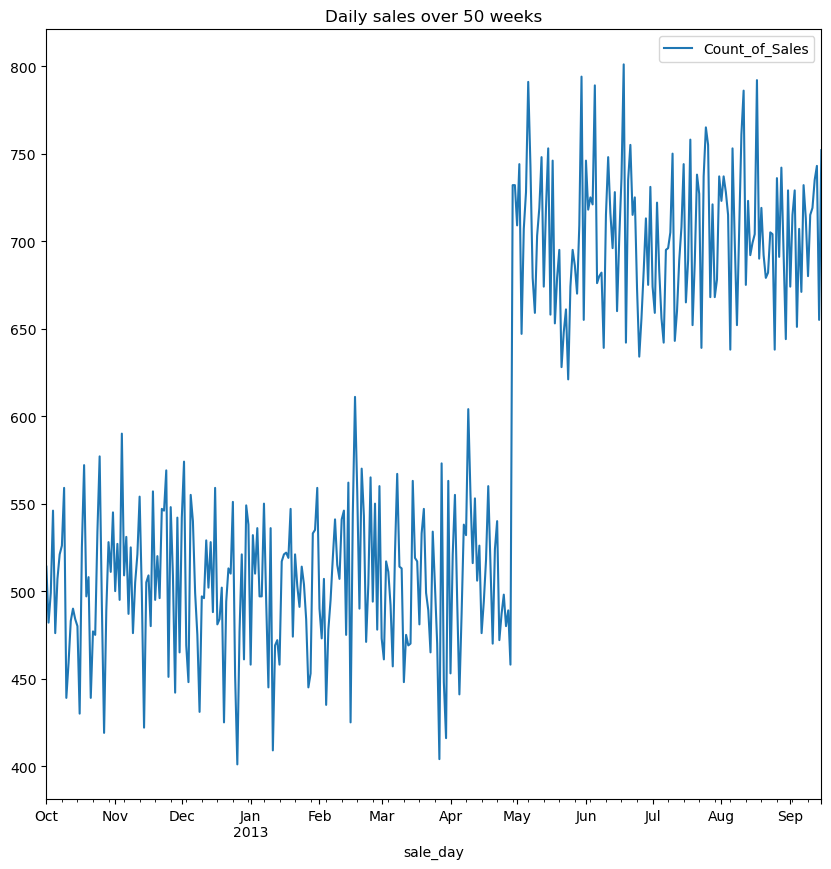

In [64]:
# Make sales_day the index to use it in plotting
daily_sales.index = daily_sales['sale_day']
daily_sales.drop(columns=['sale_day'],inplace = True)
#Plot Showing Daily sales for every week
daily_sales.plot(figsize=FIG_SIZE, title = "Daily sales over 50 weeks")
plt.show()

## Question 2:  <p></p>It looks like there has been a sudden change in daily sales. What date did it occur?

<p>At first glance it the largest change happens in April or May, but we need to dive deeper to see the actual date</p>

In [65]:
# Creating a comparison between sales for the given days, 
# which checks the difference between the day and the previous day
daily_sales['previous_day'] = [None] + daily_sales['Count_of_Sales'].to_list()[:-1]
daily_sales['difference'] = daily_sales['Count_of_Sales'] - daily_sales['previous_day']
daily_sales.head()

Count_of_Sales  previous_day  difference
sale_day                                            
2012-10-01             514           NaN         NaN
2012-10-02             482         514.0       -32.0
2012-10-03             499         482.0        17.0
2012-10-04             546         499.0        47.0
2012-10-05             476         546.0       -70.0

In [69]:
# Getting the index of the largest change to answer what date did it occur
# Then returning the record of the largest difference 
print(daily_sales['difference'].idxmax())
daily_sales[daily_sales.index == '2013-04-29']

2013-04-29 00:00:00


Count_of_Sales  previous_day  difference
sale_day                                            
2013-04-29             732         458.0       274.0

## Question 3: <p></p> Is the change in daily sales at the date you selected statistically significant? If so, what is the p-value?

In [71]:
# Drop all NaN values for the test
daily_sales.dropna(inplace=True)

In [76]:
from scipy import stats

# Performing a one-sample t-test
t_statistic, p_value = stats.ttest_1samp(daily_sales['Count_of_Sales'], 732)

# Displaying the results
print("T-statistic:", t_statistic)
print("P-value:", p_value)

T-statistic: -26.273266340051002
P-value: 1.3019593251472396e-84


<p>The P-value is 1.3019593251472396e-84, if going by traditional convention the number is below 0.05 which would make it statistically significant. So the date of 2013-04-29 was a major sales date </p>

## Question4: <p></p> Does the data suggest that the change in daily sales is due to a shift in the proportion of male-vs-female customers? Please use plots to support your answer (a rigorous statistical analysis is not necessary).

In [83]:
# Set sale_time info to a datetime, setting it to the floor of day and renaming to sales_day
df['sale_day'] = pd.to_datetime(df['sale_time']).dt.floor('d')
# Group count of sales to each gender for each day
gender_df = df.groupby(['sale_day','purchaser_gender']).size().reset_index(name='count_of_sales')
gender_df

sale_day purchaser_gender  count_of_sales
0   2012-10-01           female             413
1   2012-10-01             male             101
2   2012-10-02           female             379
3   2012-10-02             male             103
4   2012-10-03           female             386
..         ...              ...             ...
695 2013-09-13             male             537
696 2013-09-14           female             193
697 2013-09-14             male             462
698 2013-09-15           female             230
699 2013-09-15             male             522

[700 rows x 3 columns]

In [85]:
# Calculating male and female sales separately for each unique sales day
df_2 = pd.DataFrame(gender_df['sale_day'].unique(),columns=['sale_day'])
# Creating a column for female and male sales, then reset the index so we still use integer indexing
df_2['female_sales'] = pd.Series(gender_df[gender_df['purchaser_gender'] == 'female']['count_of_sales']).reset_index(drop=True)
df_2['male_sales'] = pd.Series(gender_df[gender_df['purchaser_gender'] == 'male']['count_of_sales']).reset_index(drop=True)
df_2.head()

sale_day  female_sales  male_sales
0 2012-10-01           413         101
1 2012-10-02           379         103
2 2012-10-03           386         113
3 2012-10-04           432         114
4 2012-10-05           368         108

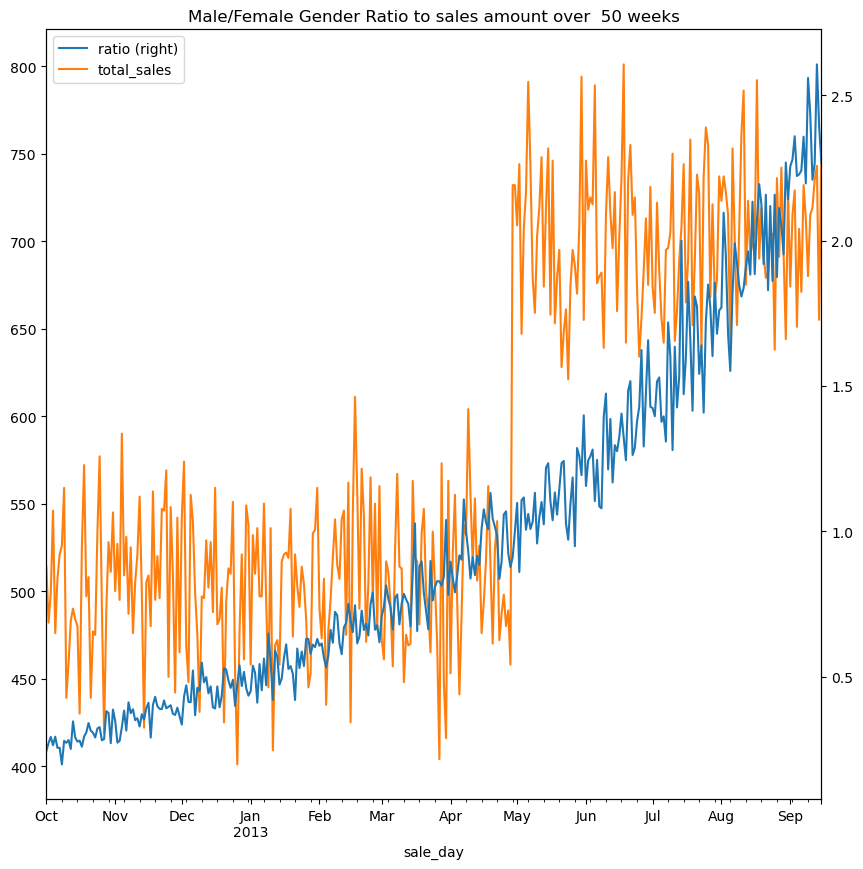

In [88]:
# Calculate the gender ratio of the sales
df_2['ratio'] = df_2['male_sales']/df_2['female_sales']

# Plotting the ratio over 50 weeks on the total sales chart to observe possible correlation
plot_df=df_2.copy()
plot_df['total_sales'] = plot_df['male_sales'] + plot_df['female_sales']
plot_df.drop(columns=['female_sales','male_sales'],inplace=True)
plot_df.index = plot_df['sale_day']
plot_df.drop(columns=['sale_day'],inplace=True)
plot_df.plot(secondary_y = ['ratio'],figsize=FIG_SIZE, title= "Male/Female Gender Ratio to sales amount over  50 weeks")
plt.show()

<p>Looking at the data in this chart, it shows that while males have increasing bought more over time it does not justify the rapid increase in sales on April 29th or afterwards. There must have been a promotion or some other factor contributing to sales</p>

## Question 5 <p></p> What is the percentage of sales in each daypart over all 50 weeks? 

In [91]:
# Extracting the sale hour to divide sales into parts of the day
df['sale_hour'] = pd.to_datetime(df['sale_time']).dt.ceil('h').dt.hour

In [92]:
# Define a function to apply sale hour column to figure out the part of day based on rules above
def day_parter(sale_hour):
    if sale_hour >= 6 and sale_hour < 12:
        return 'morning'
    if sale_hour >= 12 and sale_hour < 18:
        return 'afternoon'
    if sale_hour >= 18 and sale_hour < 24:
        return 'evening'
    if sale_hour >= 0 and sale_hour < 6:
        return 'night'
    

In [93]:
# Use the function to create day_part column
df['day_part'] = df['sale_hour'].apply(day_parter)

# dropping unneeded columns
df.drop(columns = ['purchaser_gender', 'sale_hour', 'sale_time'], inplace= True)

In [99]:
# Calculating the number of sales by time of day
df_dp = df.groupby(df.day_part).size().reset_index(name='day_part_sales')

# Calculating sales percentage for each time of day
df_dp['sales_percentage'] = (df_dp['day_part_sales']/df_dp['day_part_sales'].sum()) * 100

In [100]:
df_dp

day_part  day_part_sales  sales_percentage
0  afternoon           81159         39.719766
1    evening           53523         26.194520
2    morning           56080         27.445933
3      night           13567          6.639782

<p> No surprise that that afternoon is the largest percent of sales, generally from 12pm to 6pm people are more productive and active in everything, spending money would be no exception to that</p>